In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns

## Generate Data

C:\Users\Hammam\AppData\Local\Temp\ipykernel_17800\1661563261.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


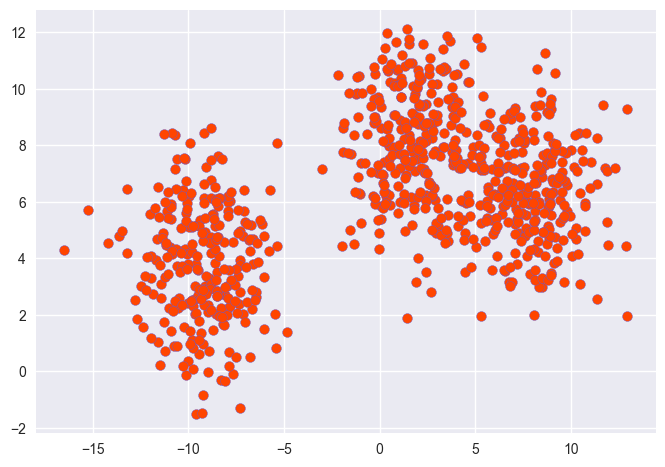

In [2]:
plt.style.use('seaborn')

X, _ = make_blobs(n_samples=800, n_features=2, centers=3, cluster_std=1.9, shuffle=True, random_state=20)

plt.scatter(X[:, 0], X[:, 1], c='orangered', edgecolors='slateblue', marker='o', s=50)
plt.show()

## Model Data

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', max_iter=300, random_state=20, )
y_km = km.fit_predict(X,)
# X.dtype()

c:\Users\Hammam\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
preview_cluster_data = pd.DataFrame({
    'centroid pada fitur 1 (sumbu x)':km.cluster_centers_[:,0],
    'centroid pada fitur 2 (sumbu y)':km.cluster_centers_[:,1],
    'cluster':list(range(3))
})
preview_cluster_data

,centroid pada fitur 1 (sumbu x),centroid pada fitur 2 (sumbu y),cluster
0,1.698130,8.100706,0
1,-9.255197,3.811364,1
2,7.891445,6.268664,2


In [5]:
preview_data = pd.DataFrame({
    'fitur 1':X[:,0],
    'fitur 2':X[:, 1],
    'cluster':y_km, 
})

preview_data

,fitur 1,fitur 2,cluster
0,1.543633,7.295645,0
1,8.633911,7.300079,2
2,3.759723,8.726375,0
3,6.549432,3.562563,2
4,-10.372268,4.259737,1
...,...,...,...
795,4.241809,9.187808,0
796,5.606792,5.863525,2
797,1.317934,7.469066,0
798,-6.501927,2.524086,1


## Plot Cluster

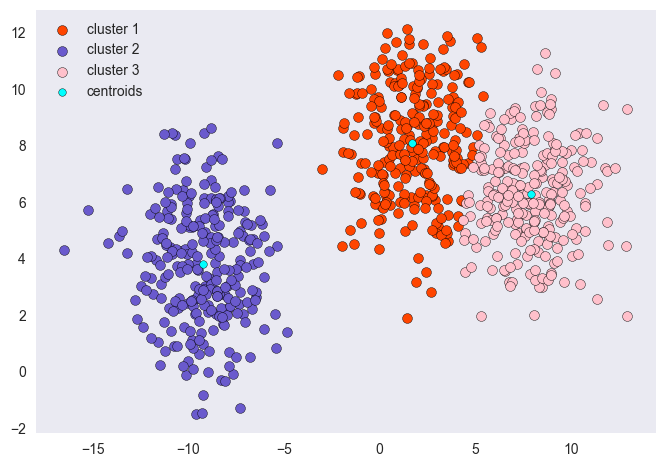

In [7]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='orangered', edgecolors='black',
    label='cluster 1',
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='slateblue', edgecolors='black',
    label='cluster 2',
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='pink', edgecolors='black', 
    label='cluster 3'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:,1],
    s=30, c='cyan', edgecolors='black', label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

## Elbow Method

In [9]:
distorions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distorions.append(km.inertia_)

c:\Users\Hammam\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hammam\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hammam\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hammam\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

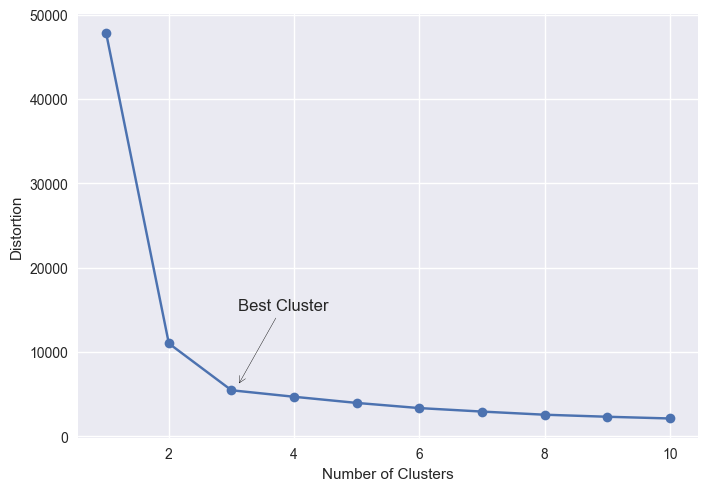

In [10]:
plt.plot(range(1, 11), distorions, marker ='o')
plt.annotate('Best Cluster', xy=(3.1, 6000), xytext=(3.1, 15000),
             arrowprops=dict(facecolor ='black', arrowstyle ='->'), fontsize = 12, 
             )
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

# ALgoritmative Clustering / Heararchical Clustering

## Small Data

### Generate Data

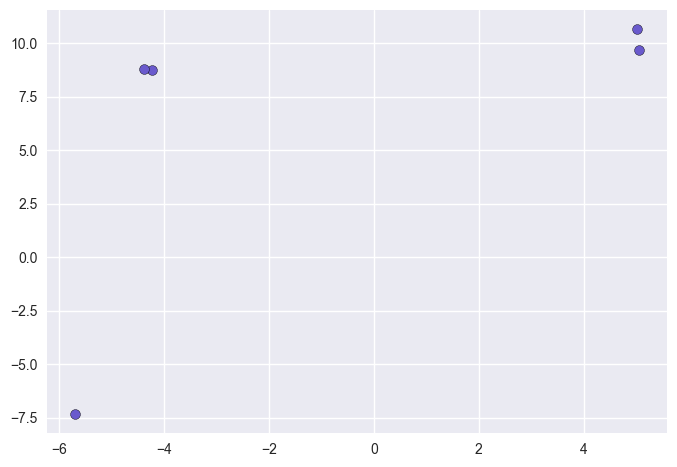

In [11]:
X, _ = make_blobs(n_samples=5, n_features=2, 
                  centers=3, cluster_std=0.5,
                  shuffle=True, random_state=31,
                  )

plt.scatter(X[:, 0], X[:, 1], c="slateblue", edgecolors='black', marker='o', s=50)
plt.show()

### Model Data

In [12]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X)

### Plot Dendogram

In [13]:
pd.DataFrame({
    'fitur 1':X[:, 0],
    'fitur 2':X[:, 1],
    'index':list(range(0,len(X)))
})

,fitur 1,fitur 2,index
0,5.053458,9.694379,0
1,-5.692724,-7.327352,1
2,-4.238378,8.766598,2
3,5.017699,10.662078,3
4,-4.388223,8.780513,4


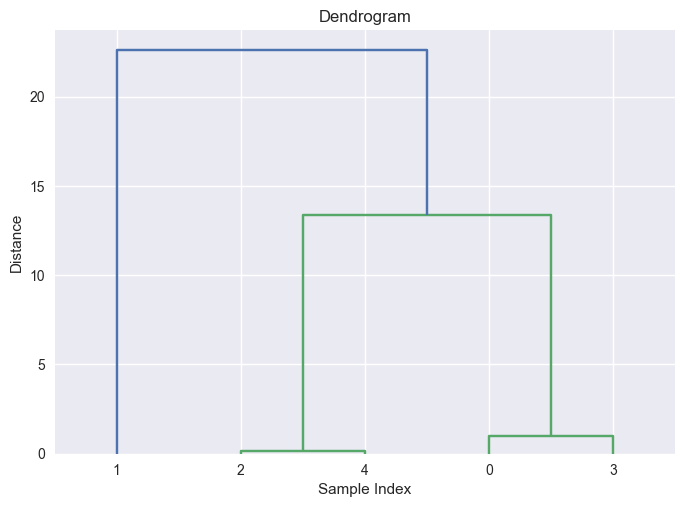

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

### Plot Cluster

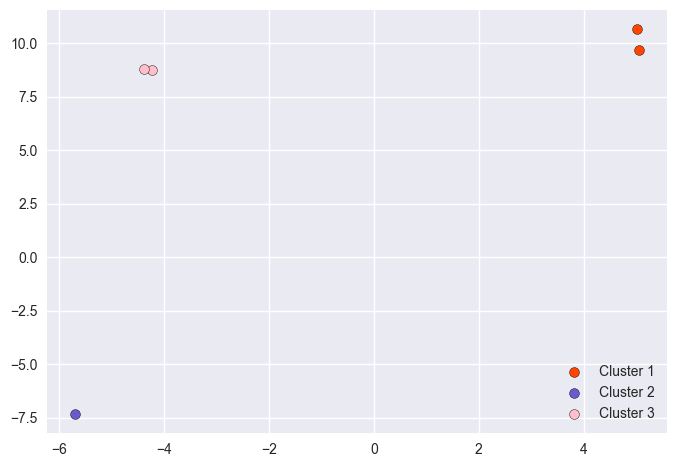

In [16]:
plt.scatter(
    X[y_agg == 0, 0], X[y_agg == 0, 1],
    s=50, c='orangered', edgecolors='black',
    label='Cluster 1',
)

plt.scatter(
    X[y_agg == 1, 0], X[y_agg == 1, 1],
    s=50, c='slateblue', edgecolors='black',
    label='Cluster 2',
)

plt.scatter(
    X[y_agg == 2, 0], X[y_agg == 2, 1],
    s=50, c='pink', edgecolors='black',
    label='Cluster 3'
)

plt.legend(scatterpoints=1)
plt.show()

## More Data

### Generate Data

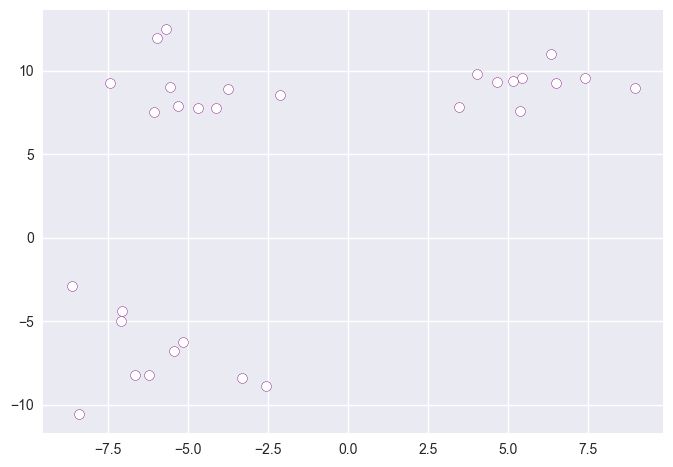

In [17]:
X, _ = make_blobs(
    n_samples=30, n_features=2, 
    centers=3, cluster_std=1.8,
    shuffle=True, random_state=31,
)

plt.scatter(X[:, 0], X[:, 1], c='white', edgecolors='purple', marker='o', s=50)
plt.show()

In [18]:
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit(X)

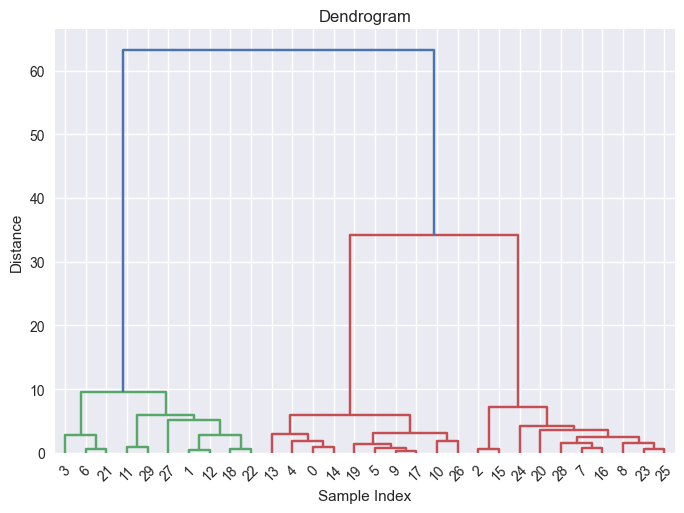

In [19]:
linkage_matrix = linkage(X, method='ward')
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linkage_matrix, labels=np.arange(len(X)), leaf_font_size=10)
plt.show()

### Plot Cluster

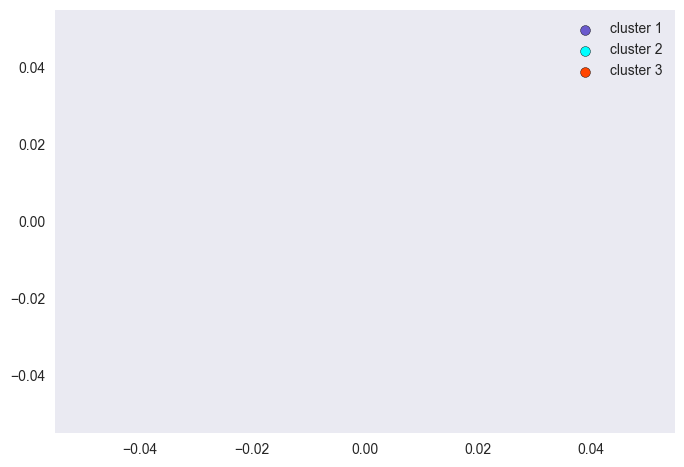

In [37]:
plt.scatter(
    X[y_agg == 0, 0], X[y_agg == 0, 1],
    s=50, c='slateblue', edgecolor='black', 
    label='cluster 1',
)

plt.scatter(
    X[y_agg == 1, 0], X[y_agg == 1, 1],
    s=50, c='cyan', edgecolor='black',
    label='cluster 2',
)

plt.scatter(
    X[y_agg == 2, 0], X[y_agg == 2, 1],
    s=50, c='orangered', edgecolor='black',
    label='cluster 3',
)

plt.legend(scatterpoints=1)
plt.grid(False)
plt.show()

# DBSCAN

### Generate Data

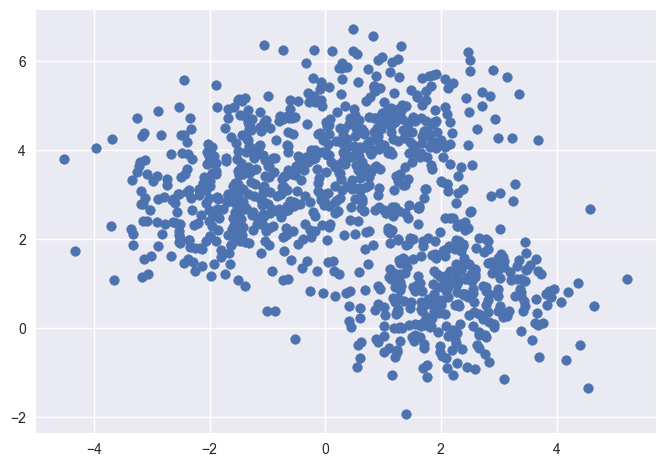

In [24]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Model Data

In [26]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(X)

### Plot Cluster

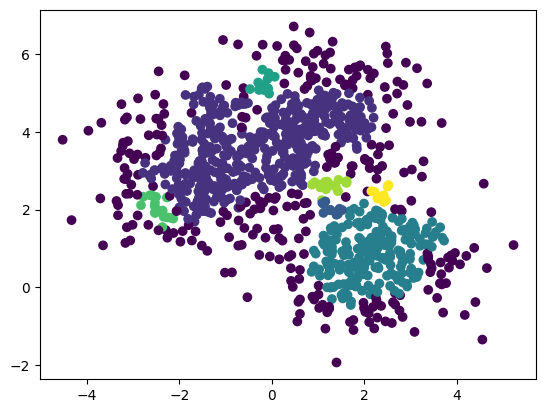

In [33]:
plt.style.use('default')
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, )
plt.show()

C:\Users\Hammam\AppData\Local\Temp\ipykernel_17800\1684985699.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


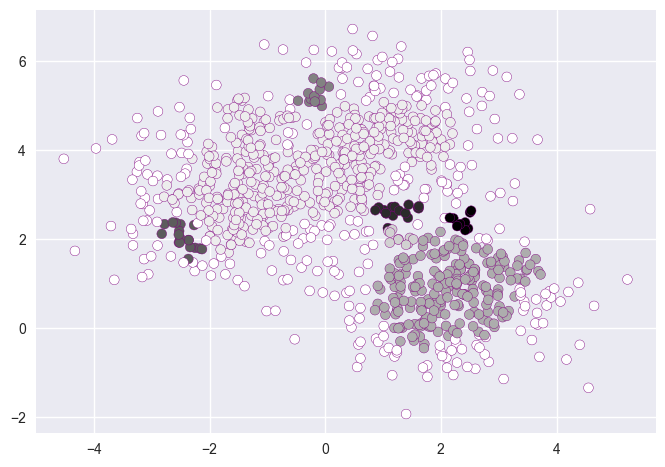

In [36]:
plt.style.use('seaborn')
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, edgecolors='purple')
plt.show()